In [ ]:
!git clone -b week11 https://github.com/vamsigp/EVA5/
%cd EVA5/trainer

Cloning into 'EVA5'...
remote: Enumerating objects: 207, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 586 (delta 123), reused 85 (delta 31), pack-reused 379
Receiving objects: 100% (586/586), 48.28 MiB | 35.54 MiB/s, done.
Resolving deltas: 100% (318/318), done.
/content/EVA5/trainer


In [ ]:
# !pip install -U albumentations

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from config import ModelConfig
from data_engine import DataEngine
from trainer import Trainer
from results import *
from utils import *

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from Albumentations import Week11Albumentations

In [ ]:
from models.CIFARS10Model import CIFARS10Model

In [ ]:
transform_album = Week11Albumentations()

In [ ]:
# View model config
args = ModelConfig(transform_album)
args.week_11_args()
args.print_config()

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 512,
  'dropout_value': 0.15,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1,
  'train_transform': <Albumentations.Week11Albumentations object at 0x7f934489e9b0>}


In [ ]:
init_seed(args)
data = DataEngine(args)

CUDA Available


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
device = which_device()
print(device)

cuda


In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR, LambdaLR

In [ ]:
model = CIFARS10Model().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0)
lr_function = lambda epoch: (epoch**2)
scheduler = LambdaLR(optimizer=optimizer, lr_lambda=lr_function)
# scheduler = StepLR(optimizer, step_size=8, gamma=0.1)
# scheduler = OneCycleLR(optimizer,max_lr=0.1,total_steps=20)
# scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

In [ ]:
trainer = Trainer(model, 
                  device,
                  train_loader=data.train_loader, 
                  test_loader = data.test_loader, 
                  optimizer = optimizer, 
                  loss_func = criterion, 
                  lr_scheduler = scheduler) 

In [ ]:
(train_loss, train_acc, test_loss, test_acc) = trainer.train_model(epochs=20, lambda_l1=0.0001)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
  0%|          | 0/98 [00:00<?, ?it/s]


Current EPOCH: 0
Current EPOCH: 0 last LR= [0.0] LR =  [0.0]


Train set: Loss=9.099780082702637 Batch_id=97 Accuracy=9.46: 100%|██████████| 98/98 [00:26<00:00,  3.69it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 941/10000 (9.41%)


Current EPOCH: 1
Current EPOCH: 1 last LR= [0.005] LR =  [0.005]


Train set: Loss=11.240676879882812 Batch_id=97 Accuracy=13.59: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0131, Accuracy: 2198/10000 (21.98%)


Current EPOCH: 2
Current EPOCH: 2 last LR= [0.02] LR =  [0.02]


Train set: Loss=7.6305084228515625 Batch_id=97 Accuracy=17.61: 100%|██████████| 98/98 [00:26<00:00,  3.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 2155/10000 (21.55%)


Current EPOCH: 3
Current EPOCH: 3 last LR= [0.045] LR =  [0.045]


Train set: Loss=4.7041850090026855 Batch_id=97 Accuracy=27.16: 100%|██████████| 98/98 [00:26<00:00,  3.70it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 3225/10000 (32.25%)


Current EPOCH: 4
Current EPOCH: 4 last LR= [0.08] LR =  [0.08]


Train set: Loss=3.731074810028076 Batch_id=97 Accuracy=35.19: 100%|██████████| 98/98 [00:26<00:00,  3.71it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 4525/10000 (45.25%)


Current EPOCH: 5
Current EPOCH: 5 last LR= [0.125] LR =  [0.125]


Train set: Loss=4.720645904541016 Batch_id=97 Accuracy=45.70: 100%|██████████| 98/98 [00:26<00:00,  3.68it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 4616/10000 (46.16%)


Current EPOCH: 6
Current EPOCH: 6 last LR= [0.18] LR =  [0.18]


Train set: Loss=3.5759215354919434 Batch_id=97 Accuracy=56.87: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 4840/10000 (48.40%)


Current EPOCH: 7
Current EPOCH: 7 last LR= [0.245] LR =  [0.245]


Train set: Loss=2.924344539642334 Batch_id=97 Accuracy=66.23: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6533/10000 (65.33%)


Current EPOCH: 8
Current EPOCH: 8 last LR= [0.32] LR =  [0.32]


Train set: Loss=2.4328484535217285 Batch_id=97 Accuracy=72.85: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7269/10000 (72.69%)


Current EPOCH: 9
Current EPOCH: 9 last LR= [0.405] LR =  [0.405]


Train set: Loss=2.32267427444458 Batch_id=97 Accuracy=74.34: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 6847/10000 (68.47%)


Current EPOCH: 10
Current EPOCH: 10 last LR= [0.5] LR =  [0.5]


Train set: Loss=2.2764294147491455 Batch_id=97 Accuracy=75.23: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 6084/10000 (60.84%)


Current EPOCH: 11
Current EPOCH: 11 last LR= [0.605] LR =  [0.605]


Train set: Loss=2.039242744445801 Batch_id=97 Accuracy=75.20: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 6330/10000 (63.30%)


Current EPOCH: 12
Current EPOCH: 12 last LR= [0.72] LR =  [0.72]


Train set: Loss=1.7433292865753174 Batch_id=97 Accuracy=74.99: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 6338/10000 (63.38%)


Current EPOCH: 13
Current EPOCH: 13 last LR= [0.845] LR =  [0.845]


Train set: Loss=1.7804887294769287 Batch_id=97 Accuracy=74.32: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6582/10000 (65.82%)


Current EPOCH: 14
Current EPOCH: 14 last LR= [0.98] LR =  [0.98]


Train set: Loss=1.8265284299850464 Batch_id=97 Accuracy=73.76: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 5798/10000 (57.98%)


Current EPOCH: 15
Current EPOCH: 15 last LR= [1.125] LR =  [1.125]


Train set: Loss=1.8482868671417236 Batch_id=97 Accuracy=71.86: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 6374/10000 (63.74%)


Current EPOCH: 16
Current EPOCH: 16 last LR= [1.28] LR =  [1.28]


Train set: Loss=1.973915457725525 Batch_id=97 Accuracy=71.31: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 5951/10000 (59.51%)


Current EPOCH: 17
Current EPOCH: 17 last LR= [1.445] LR =  [1.445]


Train set: Loss=1.8598220348358154 Batch_id=97 Accuracy=69.68: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 6028/10000 (60.28%)


Current EPOCH: 18
Current EPOCH: 18 last LR= [1.62] LR =  [1.62]


Train set: Loss=1.9853755235671997 Batch_id=97 Accuracy=66.61: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 4235/10000 (42.35%)


Current EPOCH: 19
Current EPOCH: 19 last LR= [1.805] LR =  [1.805]


Train set: Loss=2.004213571548462 Batch_id=97 Accuracy=65.26: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]



Test set: Average loss: 0.0031, Accuracy: 5136/10000 (51.36%)



In [ ]:
lr = [0,0.005,0.02,0.045,0.08,0.125,0.18,0.245,0.32,0.405,0.5,0.605,0.72,0.845, 0.98, 1.125, 1.28, 1.445, 1.62, 1.805]

In [ ]:
(train_loss[0].item())

9.099780082702637

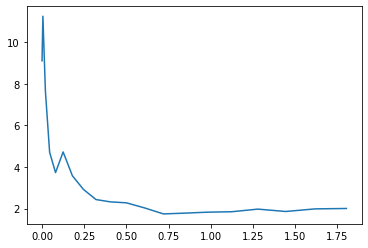

In [ ]:
plt.plot(lr,train_loss)

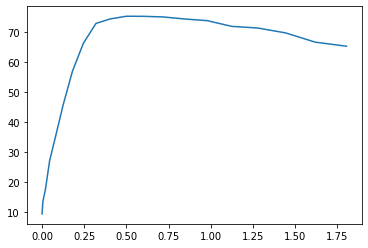

In [ ]:
plt.plot(lr,train_acc)

With OneCycle

In [ ]:
max_at_epoch = 5
epoch = 24

In [ ]:
model =  CIFARS10Model().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.06, momentum=0.9, weight_decay=6e-4)
pct = max_at_epoch / epoch
scheduler = OneCycleLR(optimizer, max_lr=0.6, pct_start=pct , steps_per_epoch=len(data.train_loader), div_factor=10, cycle_momentum=False, epochs=25)

In [ ]:
trainer = Trainer(model, 
                  device,
                  train_loader=data.train_loader, 
                  test_loader = data.test_loader, 
                  optimizer = optimizer, 
                  loss_func = criterion, 
                  lr_scheduler = scheduler) 

In [ ]:
(train_loss, train_acc, test_loss, test_acc) = trainer.train_model(epochs=epoch, lambda_l1=0.0001)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:1206: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)
  0%|          | 0/98 [00:00<?, ?it/s]


Current EPOCH: 0
Current EPOCH: 0 last LR= [0.05999999999999994] LR =  [0.05999999999999994]


Train set: Loss=7.375663757324219 Batch_id=97 Accuracy=11.09: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 1258/10000 (12.58%)


Current EPOCH: 1
Current EPOCH: 1 last LR= [0.10877811173021812] LR =  [0.10877811173021812]


Train set: Loss=5.6515583992004395 Batch_id=97 Accuracy=16.27: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0137, Accuracy: 1516/10000 (15.16%)


Current EPOCH: 2
Current EPOCH: 2 last LR= [0.23748797148409007] LR =  [0.23748797148409007]


Train set: Loss=6.2227983474731445 Batch_id=97 Accuracy=28.25: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 3534/10000 (35.34%)


Current EPOCH: 3
Current EPOCH: 3 last LR= [0.39962421689231903] LR =  [0.39962421689231903]


Train set: Loss=3.531074047088623 Batch_id=97 Accuracy=43.38: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 3833/10000 (38.33%)


Current EPOCH: 4
Current EPOCH: 4 last LR= [0.5366038857768258] LR =  [0.5366038857768258]


Train set: Loss=2.4260194301605225 Batch_id=97 Accuracy=53.21: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 5033/10000 (50.33%)


Current EPOCH: 5
Current EPOCH: 5 last LR= [0.5989335737404493] LR =  [0.5989335737404493]


Train set: Loss=1.6424819231033325 Batch_id=97 Accuracy=61.97: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 5510/10000 (55.10%)


Current EPOCH: 6
Current EPOCH: 6 last LR= [0.5971890056678925] LR =  [0.5971890056678925]


Train set: Loss=1.2346736192703247 Batch_id=97 Accuracy=66.65: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 5471/10000 (54.71%)


Current EPOCH: 7
Current EPOCH: 7 last LR= [0.5868346048932719] LR =  [0.5868346048932719]


Train set: Loss=1.5357564687728882 Batch_id=97 Accuracy=68.17: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 5240/10000 (52.40%)


Current EPOCH: 8
Current EPOCH: 8 last LR= [0.5691206845361106] LR =  [0.5691206845361106]


Train set: Loss=1.3053252696990967 Batch_id=97 Accuracy=69.32: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 5451/10000 (54.51%)


Current EPOCH: 9
Current EPOCH: 9 last LR= [0.5445017480107051] LR =  [0.5445017480107051]


Train set: Loss=1.1659001111984253 Batch_id=97 Accuracy=71.01: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 5470/10000 (54.70%)


Current EPOCH: 10
Current EPOCH: 10 last LR= [0.5136094674981158] LR =  [0.5136094674981158]


Train set: Loss=1.2153816223144531 Batch_id=97 Accuracy=71.50: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5558/10000 (55.58%)


Current EPOCH: 11
Current EPOCH: 11 last LR= [0.4772364765139777] LR =  [0.4772364765139777]


Train set: Loss=1.1640596389770508 Batch_id=97 Accuracy=71.84: 100%|██████████| 98/98 [00:27<00:00,  3.61it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 5596/10000 (55.96%)


Current EPOCH: 12
Current EPOCH: 12 last LR= [0.436316032533606] LR =  [0.436316032533606]


Train set: Loss=1.1763548851013184 Batch_id=97 Accuracy=73.19: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6977/10000 (69.77%)


Current EPOCH: 13
Current EPOCH: 13 last LR= [0.3918980714903575] LR =  [0.3918980714903575]


Train set: Loss=1.0012820959091187 Batch_id=97 Accuracy=74.99: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 7000/10000 (70.00%)


Current EPOCH: 14
Current EPOCH: 14 last LR= [0.34512226854044775] LR =  [0.34512226854044775]


Train set: Loss=0.920612096786499 Batch_id=97 Accuracy=76.22: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7296/10000 (72.96%)


Current EPOCH: 15
Current EPOCH: 15 last LR= [0.29718879630058337] LR =  [0.29718879630058337]


Train set: Loss=0.9205041527748108 Batch_id=97 Accuracy=77.15: 100%|██████████| 98/98 [00:27<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7190/10000 (71.90%)


Current EPOCH: 16
Current EPOCH: 16 last LR= [0.2493275308429625] LR =  [0.2493275308429625]


Train set: Loss=0.9202966690063477 Batch_id=97 Accuracy=78.47: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 6031/10000 (60.31%)


Current EPOCH: 17
Current EPOCH: 17 last LR= [0.20276649555960868] LR =  [0.20276649555960868]


Train set: Loss=0.8600121736526489 Batch_id=97 Accuracy=79.36: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7774/10000 (77.74%)


Current EPOCH: 18
Current EPOCH: 18 last LR= [0.15870035256273476] LR =  [0.15870035256273476]


Train set: Loss=0.9283092021942139 Batch_id=97 Accuracy=80.62: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0014, Accuracy: 7693/10000 (76.93%)


Current EPOCH: 19
Current EPOCH: 19 last LR= [0.11825975006815784] LR =  [0.11825975006815784]


Train set: Loss=0.681675910949707 Batch_id=97 Accuracy=82.00: 100%|██████████| 98/98 [00:27<00:00,  3.62it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7704/10000 (77.04%)


Current EPOCH: 20
Current EPOCH: 20 last LR= [0.08248231224598725] LR =  [0.08248231224598725]


Train set: Loss=0.6731320023536682 Batch_id=97 Accuracy=83.49: 100%|██████████| 98/98 [00:26<00:00,  3.64it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8079/10000 (80.79%)


Current EPOCH: 21
Current EPOCH: 21 last LR= [0.05228601588041824] LR =  [0.05228601588041824]


Train set: Loss=0.5996974110603333 Batch_id=97 Accuracy=85.00: 100%|██████████| 98/98 [00:26<00:00,  3.66it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8316/10000 (83.16%)


Current EPOCH: 22
Current EPOCH: 22 last LR= [0.028445636939759017] LR =  [0.028445636939759017]


Train set: Loss=0.6842373609542847 Batch_id=97 Accuracy=86.11: 100%|██████████| 98/98 [00:26<00:00,  3.63it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8490/10000 (84.90%)


Current EPOCH: 23
Current EPOCH: 23 last LR= [0.011572871390129568] LR =  [0.011572871390129568]


Train set: Loss=0.5729784369468689 Batch_id=97 Accuracy=87.21: 100%|██████████| 98/98 [00:26<00:00,  3.65it/s]



Test set: Average loss: 0.0009, Accuracy: 8513/10000 (85.13%)



In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
			'frog', 'horse', 'ship', 'truck')

In [ ]:
trainer.classwise_acc(classes)


Accuracy of plane : 66 %
Accuracy of   car : 90 %
Accuracy of  bird : 100 %
Accuracy of   cat : 80 %
Accuracy of  deer : 66 %
Accuracy of   dog : 55 %
Accuracy of  frog : 100 %
Accuracy of horse : 100 %
Accuracy of  ship : 100 %
Accuracy of truck : 83 %



In [ ]:
misclassified_imgs = trainer.get_misclassified()

/content/EVA5/trainer/trainer.py:152: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  misclassified_inds = (is_correct == 0).nonzero()[:, 0]


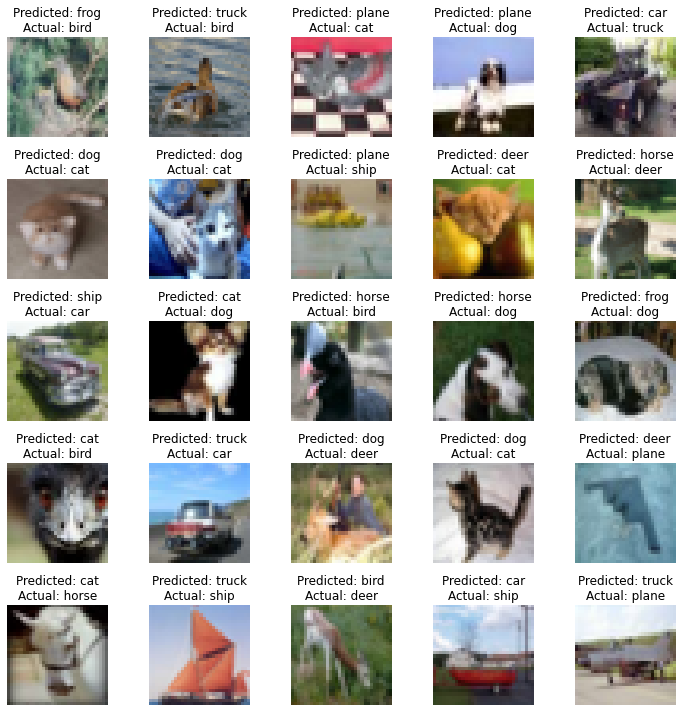

In [ ]:
plot_misclassified_images(misclassified_imgs, classes, "misclassified_images1.png")

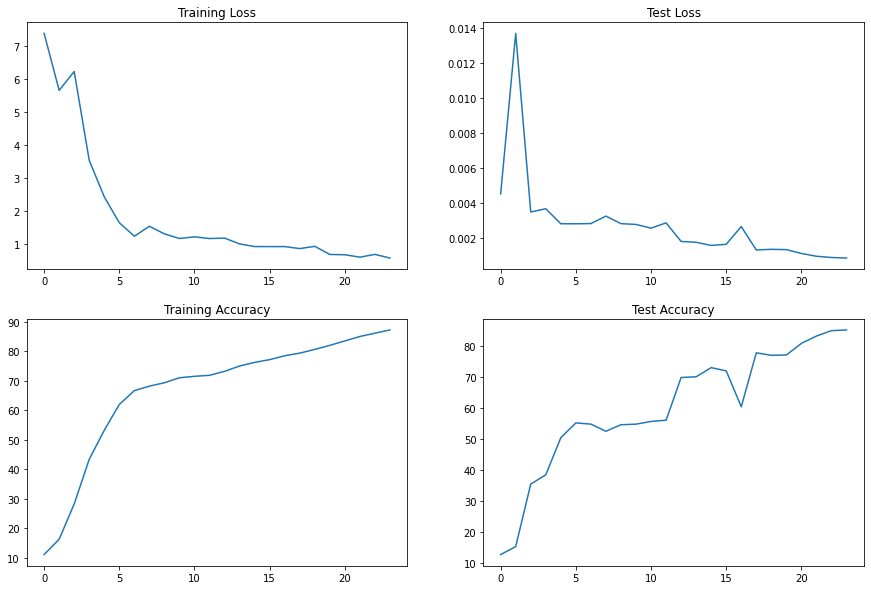

In [ ]:
from results import plot_metrics
plot_metrics(train_loss, train_acc, test_loss, test_acc)